## Automated Code

In [1]:
import os
import numpy as np
import pandas as pd
path_to_json = r'C:\Users\shakshi\Desktop\phemernrdataset\pheme-rnr-dataset\charliehebdo/'
folders = [pos_json for pos_json in os.listdir(path_to_json) ]
print(folders)

['non-rumours', 'rumours']


In [2]:
#folders[0]
import json
import csv

In [3]:
base = r'C:\Users\shakshi\Desktop\phemernrdataset\pheme-rnr-dataset\charliehebdo'

In [4]:
# to display full text
pd.set_option('display.max_colwidth', -1)

## Extract features from json and write to csv file on disk

In [49]:
for folder in folders:
    data = []
    if folder == 'non-rumours':
            within_tweetid = os.path.join(base, folder)
            #print(within_tweetid)
            within_folders = [pos for pos in os.listdir(within_tweetid)]
            #print(within_folders)
            for file in within_folders:
                within_tweetfolder = os.path.join(base, folder, file)
                #print (within_tweetfolder)
                src_tweet = [pos for pos in os.listdir(within_tweetfolder)]
                #print(each_tweet)
                if src_tweet[1] == 'source-tweet':
                    source = os.path.join(base, folder, file, within_tweetfolder, src_tweet[1])
                    #print(source)
                    tweets = [pos for pos in os.listdir(source)]
                    #print(tweets)
                    for tweet in tweets:
                        ids = os.path.join(base, folder, file, within_tweetfolder, src_tweet[1], tweet)
                        if ids.endswith('.json'):
                            data = []
                            #print(ids)
                            with open(ids,'r') as f:
                                src_json = json.load(f)
                            src_df = pd.DataFrame(src_json)
                            temp = src_df.user.location
                            temp1 = src_df.user.followers_count
                            src_df = src_df[['text', 'created_at', 'id']]
                            src_df['location'] = temp
                            src_df['followers'] = temp1
                            src_df = src_df.reset_index()
                            src_df.drop(['index'], axis = 1, inplace = True)
                            src_df = src_df.iloc[0,:]
                            src_df = src_df.reset_index()
                            src_df.drop("index", axis = 1, inplace = True)
                            data.append(src_df.iloc[2,0])
                            data.append(src_df.iloc[0,0])
                            data.append(src_df.iloc[1,0])
                            data.append(src_df.iloc[3,0])
                            data.append(src_df.iloc[4,0])
                            print("***********************************************************************")
                        
                            
                        if src_tweet[0] == 'reactions':
                            reactions = os.path.join(base, folder, file, within_tweetfolder, src_tweet[0])
                            tweets_reactions = [pos for pos in os.listdir(reactions)]
                            for tweet_reaction in tweets_reactions:
                                mix_data = []
                                mix_data.extend(data)
                                ids_reactions = os.path.join(base, folder, file, within_tweetfolder, src_tweet[0], tweet_reaction)
                                if ids_reactions.endswith('.json'):
                                    data_reactions = []
                                    with open(ids_reactions,'r') as f:
                                        reactions_json = json.load(f)
                                    reactions_df = pd.DataFrame(reactions_json)
                                    temp = reactions_df.user.location
                                    temp1 = reactions_df.user.followers_count
                                    reactions_df = reactions_df[['text', 'created_at', 'id']]
                                    reactions_df['location'] = temp
                                    reactions_df['followers_count'] = temp1
                                    reactions_df = reactions_df.reset_index()
                                    reactions_df.drop(['index'], axis = 1, inplace = True)
                                    reactions_df = reactions_df.iloc[0,:]
                                    reactions_df = reactions_df.reset_index()
                                    reactions_df.drop("index", axis = 1, inplace = True)
                                    data_reactions.append(reactions_df.iloc[2,0])
                                    data_reactions.append(reactions_df.iloc[0,0])
                                    data_reactions.append(reactions_df.iloc[1,0])
                                    data_reactions.append(reactions_df.iloc[3,0])
                                    data_reactions.append(reactions_df.iloc[4,0])
                                    mix_data.extend(data_reactions)
                                    mix_data.append(0)
                                    #data_reactions.append(0)
                                    with open(r'C:\Users\shakshi\Desktop\phemernrdataset\pheme-rnr-dataset\dump_charliehebdo.csv', 'a',newline = '', encoding = 'utf-8') as csvFile:
                                        writer = csv.writer(csvFile)
                                        writer.writerow(mix_data)
                                    csvFile.close()

                    
                            
                                
                            
    elif folder == 'rumours':
        within_tweetid_r = os.path.join(base, folder)
            #print(within_tweetid)
        within_folders_r = [pos for pos in os.listdir(within_tweetid_r)]
            #print(within_folders)
        for file_r in within_folders_r:
            within_tweetfolder_r = os.path.join(base, folder, file_r)
                #print (within_tweetfolder)
            src_tweet_r = [pos for pos in os.listdir(within_tweetfolder_r)]
                #print(each_tweet)
            if src_tweet_r[1] == 'source-tweet':
                source_r = os.path.join(base, folder, file_r, within_tweetfolder_r, src_tweet_r[1])
                    #print(source)
                tweets_r = [pos for pos in os.listdir(source_r)]
                    #print(tweets)
                for tweet_r in tweets_r:
                    ids_r = os.path.join(base, folder, file_r, within_tweetfolder_r, src_tweet_r[1], tweet_r)
                    if ids_r.endswith('.json'):
                        data = []
                            #print(ids)
                        with open(ids_r,'r') as f:
                            src_json_r = json.load(f)
                        src_df_r = pd.DataFrame(src_json_r)
                        temp = src_df_r.user.location
                        temp1 = src_df_r.user.followers_count
                        src_df_r = src_df_r[['text', 'created_at', 'id']]
                        src_df_r['location'] = temp
                        src_df_r['followers'] = temp1
                        src_df_r = src_df_r.reset_index()
                        src_df_r.drop(['index'], axis = 1, inplace = True)
                        src_df_r = src_df_r.iloc[0,:]
                        src_df_r = src_df_r.reset_index()
                        src_df_r.drop("index", axis = 1, inplace = True)
                        data.append(src_df_r.iloc[2,0])
                        data.append(src_df_r.iloc[0,0])
                        data.append(src_df_r.iloc[1,0])
                        data.append(src_df_r.iloc[3,0])
                        data.append(src_df_r.iloc[4,0])
                        print("***********************************************************************")
                    if src_tweet_r[0] == 'reactions':
                            reactions_r = os.path.join(base, folder, file_r, within_tweetfolder_r, src_tweet_r[0])
                            tweets_reactions_r = [pos for pos in os.listdir(reactions_r)]
                            for tweet_reaction_r in tweets_reactions_r:
                                mix_data_r = []
                                mix_data_r.extend(data)
                                ids_reactions_r = os.path.join(base, folder, file_r, within_tweetfolder_r, src_tweet_r[0], tweet_reaction_r)
                                if ids_reactions_r.endswith('.json'):
                                    data_reactions_r = []
                                    with open(ids_reactions_r,'r') as f:
                                        reactions_json_r = json.load(f)
                                    reactions_df_r = pd.DataFrame(reactions_json_r)
                                    temp = reactions_df_r.user.location
                                    temp1 = reactions_df_r.user.followers_count
                                    reactions_df_r = reactions_df_r[['text', 'created_at', 'id']]
                                    reactions_df_r['location'] = temp
                                    reactions_df_r['followers'] = temp1
                                    reactions_df_r = reactions_df_r.reset_index()
                                    reactions_df_r.drop(['index'], axis = 1, inplace = True)
                                    reactions_df_r = reactions_df_r.iloc[0,:]
                                    reactions_df_r = reactions_df_r.reset_index()
                                    reactions_df_r.drop("index", axis = 1, inplace = True)
                                    data_reactions_r.append(reactions_df_r.iloc[2,0])
                                    data_reactions_r.append(reactions_df_r.iloc[0,0])
                                    data_reactions_r.append(reactions_df_r.iloc[1,0])
                                    data_reactions_r.append(reactions_df_r.iloc[3,0])
                                    data_reactions_r.append(reactions_df_r.iloc[4,0])
                                    mix_data_r.extend(data_reactions_r)
                                    mix_data_r.append(1)
                                    #data_reactions.append(0)
                                    with open(r'C:\Users\shakshi\Desktop\phemernrdataset\pheme-rnr-dataset\dump_charliehebdo.csv', 'a',newline = '', encoding = 'utf-8') as csvFile:
                                        writer = csv.writer(csvFile)
                                        writer.writerow(mix_data_r)
                                    csvFile.close()
                    
    del src_df
    del src_df_r
    import gc
    gc.collect()
    
print(within_tweetid)

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
***********************************************************************
****************************************************************

NameError: name 'src_df' is not defined

## Load csv file where data is written

In [86]:
df = pd.read_csv(r'C:\Users\shakshi\Desktop\phemernrdataset\pheme-rnr-dataset\dump_charliehebdo.csv', encoding = 'utf-8', header = None)

In [87]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552785249420447745,"Now 10 dead in a shooting there today RT ""@BBCDanielS: Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago”",Wed Jan 07 11:14:08 +0000 2015,Chicago,4671,0
1,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552786761534144512,@BBCDanielS @BBCWorld I'm guessing this is being considered terrorism right now or lone wolf?,Wed Jan 07 11:20:08 +0000 2015,South Carolina,59,0
2,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552786803884060672,@BBCDanielS @BBCWorld why would you mention that before knowing the facts #islamphobiaatitsbest,Wed Jan 07 11:20:18 +0000 2015,NaN,96357,0
3,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552786954656710656,@BBCDanielS @BBCWorld perps identified?,Wed Jan 07 11:20:54 +0000 2015,NaN,751,0
4,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552787979224092672,@BBCDanielS @BBCWorld who is charlie hebdo?,Wed Jan 07 11:24:59 +0000 2015,Singapore,115,0


In [88]:
df.columns = ['id','text', 'time', 'location','followers', 'reply_id','reply_text', 'reply_time', 'reply_location', 'reply_followers', 'rumour']

In [89]:
df.head()

,id,text,time,location,followers,reply_id,reply_text,reply_time,reply_location,reply_followers,rumour
0,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552785249420447745,"Now 10 dead in a shooting there today RT ""@BBCDanielS: Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago”",Wed Jan 07 11:14:08 +0000 2015,Chicago,4671,0
1,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552786761534144512,@BBCDanielS @BBCWorld I'm guessing this is being considered terrorism right now or lone wolf?,Wed Jan 07 11:20:08 +0000 2015,South Carolina,59,0
2,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552786803884060672,@BBCDanielS @BBCWorld why would you mention that before knowing the facts #islamphobiaatitsbest,Wed Jan 07 11:20:18 +0000 2015,NaN,96357,0
3,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552786954656710656,@BBCDanielS @BBCWorld perps identified?,Wed Jan 07 11:20:54 +0000 2015,NaN,751,0
4,552784600502915072,Charlie Hebdo became well known for publishing the Muhammed cartoons two years ago,Wed Jan 07 11:11:33 +0000 2015,NaN,41591,552787979224092672,@BBCDanielS @BBCWorld who is charlie hebdo?,Wed Jan 07 11:24:59 +0000 2015,Singapore,115,0


In [90]:
#rumour_df = df.sample(frac = 1)
rumour_df = df.dropna()

In [91]:
rumour_df.head()

,id,text,time,location,followers,reply_id,reply_text,reply_time,reply_location,reply_followers,rumour
39,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",Wed Jan 07 11:15:12 +0000 2015,St Albans / Cornwall,464,0
40,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",Wed Jan 07 11:17:04 +0000 2015,Australia,296,0
42,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",Wed Jan 07 11:23:23 +0000 2015,England,131,0
43,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,Wed Jan 07 12:11:17 +0000 2015,"Stockholm, Sweden",1101,0
44,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,Wed Jan 07 12:15:23 +0000 2015,Deutschland,425,0


In [92]:
rumour_df = rumour_df.reset_index()
rumour_df = rumour_df.drop('index', axis = 1)
rumour_df.head()

,id,text,time,location,followers,reply_id,reply_text,reply_time,reply_location,reply_followers,rumour
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",Wed Jan 07 11:15:12 +0000 2015,St Albans / Cornwall,464,0
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",Wed Jan 07 11:17:04 +0000 2015,Australia,296,0
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",Wed Jan 07 11:23:23 +0000 2015,England,131,0
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,Wed Jan 07 12:11:17 +0000 2015,"Stockholm, Sweden",1101,0
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,Wed Jan 07 12:15:23 +0000 2015,Deutschland,425,0


In [93]:
rumour_df.shape

(20305, 11)

## NLP Stuff

In [94]:
import re
# function for cleaning data
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [95]:
rumour_df['clean_text'] = np.vectorize(remove_pattern)(rumour_df['text'], "@[\w]*")
rumour_df['clean_reply'] = np.vectorize(remove_pattern)(rumour_df['reply_text'], "@[\w]*")

In [96]:
rumour_df.head()

,id,text,time,location,followers,reply_id,reply_text,reply_time,reply_location,reply_followers,rumour,clean_text,clean_reply
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",Wed Jan 07 11:15:12 +0000 2015,St Albans / Cornwall,464,0,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,"what is that, for those of us hard of French?"
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",Wed Jan 07 11:17:04 +0000 2015,Australia,296,0,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,"Looks to me like the religion of peace has struck again, no?"
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",Wed Jan 07 11:23:23 +0000 2015,England,131,0,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,"here's one off the shelf section for the article - 'it's not islam, definitely not islam.'"
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,Wed Jan 07 12:11:17 +0000 2015,"Stockholm, Sweden",1101,0,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Wed Jan 07 11:12:44 +0000 2015,Guido.Fawkes@Order-Order.com,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,Wed Jan 07 12:15:23 +0000 2015,Deutschland,425,0,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,iSSlam #tcot #UK #Cameron #EU #BREAKING http://t.co/0cQdGEi1rT


In [97]:
rumour_df = rumour_df[['id', 'text', 'followers', 'reply_id', 'reply_text','reply_followers', 'clean_text', 'clean_reply', 'rumour']]

In [98]:
rumour_df.head()

,id,text,followers,reply_id,reply_text,reply_followers,clean_text,clean_reply,rumour
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",464,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,"what is that, for those of us hard of French?",0
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",296,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,"Looks to me like the religion of peace has struck again, no?",0
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",131,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,"here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",0
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,1101,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,0
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,425,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,iSSlam #tcot #UK #Cameron #EU #BREAKING http://t.co/0cQdGEi1rT,0


In [99]:
rumour_df['clean_text'] = rumour_df['clean_text'].str.replace("[^a-zA-Z#]", " ")
rumour_df['clean_reply'] = rumour_df['clean_reply'].str.replace("[^a-zA-Z#]", " ")

In [100]:
rumour_df.head()

,id,text,followers,reply_id,reply_text,reply_followers,clean_text,clean_reply,rumour
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",464,Charlie Hebdo s Last Tweet Before Shootings http t co Oa xAqOcM http t co skJHNEQcn,what is that for those of us hard of French,0
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",296,Charlie Hebdo s Last Tweet Before Shootings http t co Oa xAqOcM http t co skJHNEQcn,Looks to me like the religion of peace has struck again no,0
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",131,Charlie Hebdo s Last Tweet Before Shootings http t co Oa xAqOcM http t co skJHNEQcn,here s one off the shelf section for the article it s not islam definitely not islam,0
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,1101,Charlie Hebdo s Last Tweet Before Shootings http t co Oa xAqOcM http t co skJHNEQcn,Any w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,0
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,425,Charlie Hebdo s Last Tweet Before Shootings http t co Oa xAqOcM http t co skJHNEQcn,iSSlam #tcot #UK #Cameron #EU #BREAKING http t co cQdGEi rT,0


In [101]:
rumour_df['clean_text'] = rumour_df.clean_text.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
rumour_df['clean_reply'] = rumour_df.clean_reply.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))

In [102]:
rumour_df.head()

,id,text,followers,reply_id,reply_text,reply_followers,clean_text,clean_reply,rumour
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",464,Charlie Hebdo Last Tweet Before Shootings http xAqOcM http skJHNEQcn,what that those hard French,0
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",296,Charlie Hebdo Last Tweet Before Shootings http xAqOcM http skJHNEQcn,Looks like religion peace struck again,0
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",131,Charlie Hebdo Last Tweet Before Shootings http xAqOcM http skJHNEQcn,here shelf section article islam definitely islam,0
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,1101,Charlie Hebdo Last Tweet Before Shootings http xAqOcM http skJHNEQcn,dignity shld condemn barbaric terrorist #Paris Terrorists stop destruction #world peace,0
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,425,Charlie Hebdo Last Tweet Before Shootings http xAqOcM http skJHNEQcn,iSSlam #tcot #Cameron #BREAKING http cQdGEi,0


In [103]:
rumour_df.clean_text = rumour_df.clean_text.apply(lambda x: x.split())
rumour_df.clean_reply = rumour_df.clean_reply.apply(lambda x: x.split())

In [104]:
rumour_df.head()

,id,text,followers,reply_id,reply_text,reply_followers,clean_text,clean_reply,rumour
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",464,"[Charlie, Hebdo, Last, Tweet, Before, Shootings, http, xAqOcM, http, skJHNEQcn]","[what, that, those, hard, French]",0
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",296,"[Charlie, Hebdo, Last, Tweet, Before, Shootings, http, xAqOcM, http, skJHNEQcn]","[Looks, like, religion, peace, struck, again]",0
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",131,"[Charlie, Hebdo, Last, Tweet, Before, Shootings, http, xAqOcM, http, skJHNEQcn]","[here, shelf, section, article, islam, definitely, islam]",0
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,1101,"[Charlie, Hebdo, Last, Tweet, Before, Shootings, http, xAqOcM, http, skJHNEQcn]","[dignity, shld, condemn, barbaric, terrorist, #Paris, Terrorists, stop, destruction, #world, peace]",0
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,425,"[Charlie, Hebdo, Last, Tweet, Before, Shootings, http, xAqOcM, http, skJHNEQcn]","[iSSlam, #tcot, #Cameron, #BREAKING, http, cQdGEi]",0


In [105]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet_text = rumour_df.clean_text.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet_reply = rumour_df.clean_reply.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [106]:
tokenized_tweet_text.head()

0    [charli, hebdo, last, tweet, befor, shoot, http, xaqocm, http, skjhneqcn]
1    [charli, hebdo, last, tweet, befor, shoot, http, xaqocm, http, skjhneqcn]
2    [charli, hebdo, last, tweet, befor, shoot, http, xaqocm, http, skjhneqcn]
3    [charli, hebdo, last, tweet, befor, shoot, http, xaqocm, http, skjhneqcn]
4    [charli, hebdo, last, tweet, befor, shoot, http, xaqocm, http, skjhneqcn]
Name: clean_text, dtype: object

In [107]:
tokenized_tweet_reply.head()

0    [what, that, those, hard, french]                                                          
1    [look, like, religion, peac, struck, again]                                                
2    [here, shelf, section, articl, islam, definit, islam]                                      
3    [digniti, shld, condemn, barbar, terrorist, #pari, terrorist, stop, destruct, #world, peac]
4    [isslam, #tcot, #cameron, #break, http, cqdgei]                                            
Name: clean_reply, dtype: object

In [108]:
for i in range(len(tokenized_tweet_text)):
    tokenized_tweet_text[i] = ' '.join(tokenized_tweet_text[i])    
rumour_df['clean_text'] = tokenized_tweet_text

In [109]:
for i in range(len(tokenized_tweet_reply)):
    tokenized_tweet_reply[i] = ' '.join(tokenized_tweet_reply[i])    
rumour_df['clean_reply'] = tokenized_tweet_reply

In [110]:
rumour_df.head()

,id,text,followers,reply_id,reply_text,reply_followers,clean_text,clean_reply,rumour
0,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785520028557314,"@GuidoFawkes what is that, for those of us hard of French?",464,charli hebdo last tweet befor shoot http xaqocm http skjhneqcn,what that those hard french,0
1,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552785988234125313,"@GuidoFawkes @JamesDelingpole Looks to me like the religion of peace has struck again, no?",296,charli hebdo last tweet befor shoot http xaqocm http skjhneqcn,look like religion peac struck again,0
2,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552787579096293377,"@GuidoFawkes @apwtrader here's one off the shelf section for the article - 'it's not islam, definitely not islam.'",131,charli hebdo last tweet befor shoot http xaqocm http skjhneqcn,here shelf section articl islam definit islam,0
3,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552799630900334592,@GuidoFawkes @benjaminkatzeff Any1 w dignity shld condemn the barbaric terrorist act in #Paris Terrorists stop the destruction #world peace,1101,charli hebdo last tweet befor shoot http xaqocm http skjhneqcn,digniti shld condemn barbar terrorist #pari terrorist stop destruct #world peac,0
4,552784898743099392,Charlie Hebdo’s Last Tweet Before Shootings http://t.co/9Oa2xAqOcM http://t.co/skJHNEQcn0,139847,552800663596703744,iSSlam #tcot #UK #Cameron #EU #BREAKING @GuidoFawkes @friendsofbibi http://t.co/0cQdGEi1rT,425,charli hebdo last tweet befor shoot http xaqocm http skjhneqcn,isslam #tcot #cameron #break http cqdgei,0


## Analysis

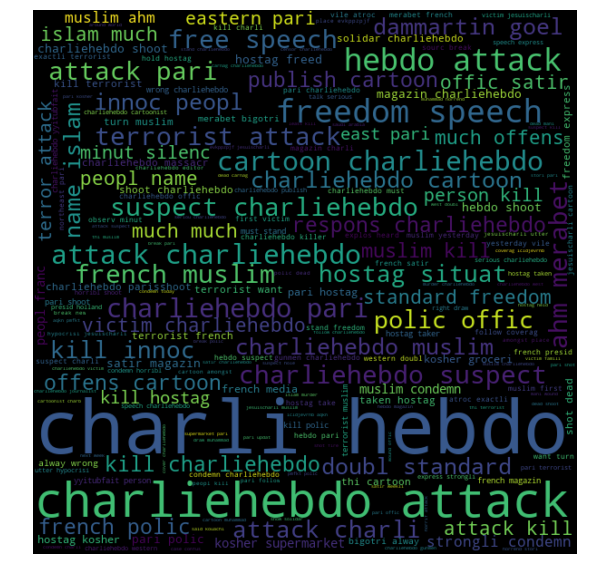

In [112]:
import matplotlib.pyplot as plt
words = ' '.join([text for text in rumour_df['clean_text']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=120).generate(words) 
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

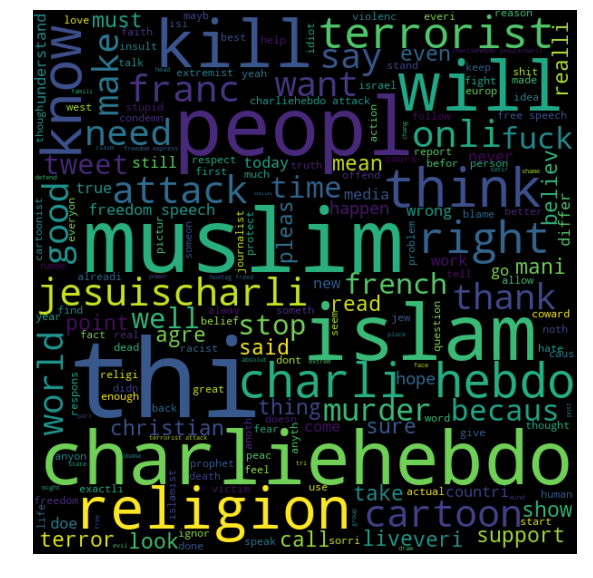

In [113]:
import matplotlib.pyplot as plt
words = ' '.join([text for text in rumour_df['clean_reply']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=120).generate(words) 
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

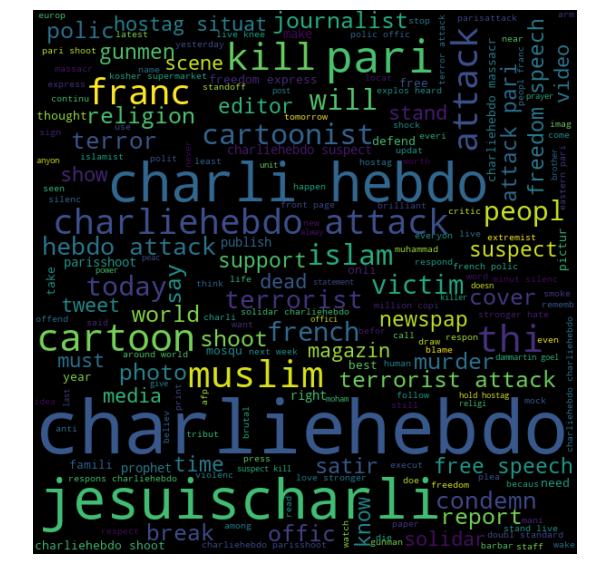

In [147]:
normal_words =' '.join([text for text in rumour_df['clean'][rumour_df['rumour'] == 0]]) # 0 means not a rumour 

wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

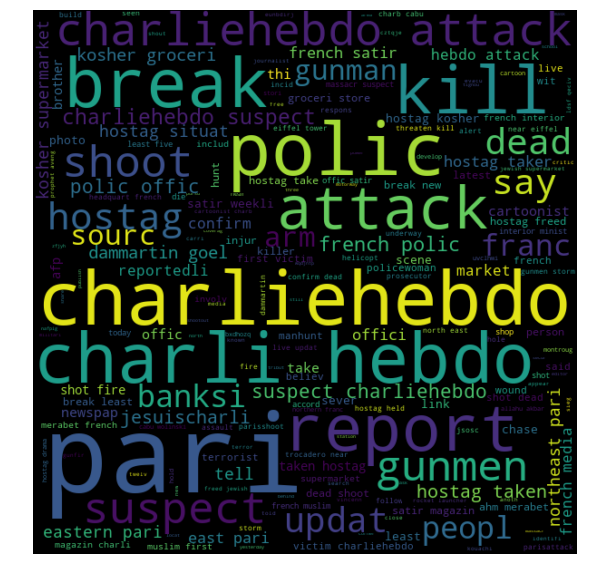

In [148]:
normal_words =' '.join([text for text in rumour_df['clean'][rumour_df['rumour'] == 1]]) 

wordcloud = WordCloud(width=600, height=600, random_state=129, max_font_size=120).generate(normal_words)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Create Graph

In [116]:
import networkx as nx

In [165]:
short_graph = rumour_df.head(10)

In [166]:
G = nx.from_pandas_edgelist(df=short_graph, source='id', target='reply_id')

In [167]:
nodes = list(short_graph.id)
nodes1 = list(short_graph.reply_id)
nodes.extend(nodes1)
print(nodes)

[552784898743099392, 552784898743099392, 552784898743099392, 552784898743099392, 552784898743099392, 552784898743099392, 552784898743099392, 552785391653494784, 552785391653494784, 552785391653494784, 552785520028557314, 552785988234125313, 552787579096293377, 552799630900334592, 552800663596703744, 552826452983701504, 552846821375369216, 552786136062783488, 552786466666217472, 552787727754985472]


In [168]:
G.add_nodes_from(nodes_for_adding=nodes)

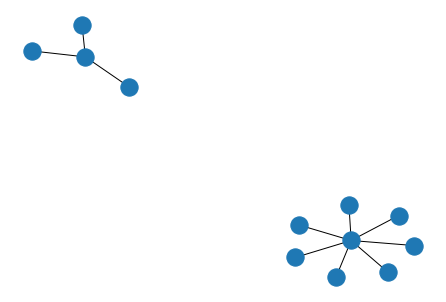

In [169]:
nx.draw(G)

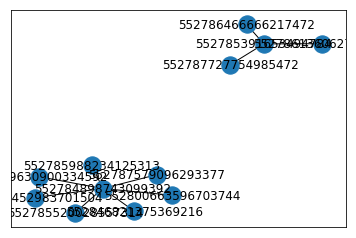

In [170]:
nx.draw_networkx(G, with_labels=True) 

In [171]:
nx.algorithms.degree_centrality(G)

{552784898743099392: 0.6363636363636364,
 552785520028557314: 0.09090909090909091,
 552785988234125313: 0.09090909090909091,
 552787579096293377: 0.09090909090909091,
 552799630900334592: 0.09090909090909091,
 552800663596703744: 0.09090909090909091,
 552826452983701504: 0.09090909090909091,
 552846821375369216: 0.09090909090909091,
 552785391653494784: 0.2727272727272727,
 552786136062783488: 0.09090909090909091,
 552786466666217472: 0.09090909090909091,
 552787727754985472: 0.09090909090909091}

In [172]:
nx.density(G) # Average edge density of the Graphs

0.15151515151515152

In [173]:
nx.average_shortest_path_length(G) # Average shortest path length for ALL paths in the Graph

NetworkXError: Graph is not connected.

In [174]:
nx.is_connected(G)

False

In [175]:
from node2vec import Node2Vec

In [176]:
# Generate walks
node2vec = Node2Vec(G, dimensions=20, walk_length=10, num_walks=10)

Generating walks (CPU: 1): 100%|██████████████████████████████████████████████████████| 10/10 [00:00<00:00, 192.82it/s]


In [177]:
node2vec.walks

[['552786136062783488',
  '552785391653494784',
  '552786466666217472',
  '552785391653494784',
  '552786466666217472',
  '552785391653494784',
  '552786136062783488',
  '552785391653494784',
  '552786136062783488',
  '552785391653494784'],
 ['552785988234125313',
  '552784898743099392',
  '552846821375369216',
  '552784898743099392',
  '552785988234125313',
  '552784898743099392',
  '552799630900334592',
  '552784898743099392',
  '552800663596703744',
  '552784898743099392'],
 ['552787579096293377',
  '552784898743099392',
  '552799630900334592',
  '552784898743099392',
  '552799630900334592',
  '552784898743099392',
  '552826452983701504',
  '552784898743099392',
  '552785988234125313',
  '552784898743099392'],
 ['552784898743099392',
  '552800663596703744',
  '552784898743099392',
  '552846821375369216',
  '552784898743099392',
  '552800663596703744',
  '552784898743099392',
  '552846821375369216',
  '552784898743099392',
  '552785520028557314'],
 ['552786466666217472',
  '552785391

In [178]:
# Learn embeddings 
model = node2vec.fit(window=10, min_count=1)

In [179]:
for node, _ in model.most_similar('552784898743099392'):
    print(node)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


552785391653494784
552786136062783488
552785988234125313
552786466666217472
552800663596703744
552846821375369216
552785520028557314
552826452983701504
552787727754985472
552799630900334592


In [180]:
file = 'node2vec.txt'

In [181]:
model.wv.save_word2vec_format(file,binary = False)

In [182]:
import os
emb = {}
f = open(os.path.join('', 'node2vec.txt'), encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    value = np.asarray(values[1:])
    emb[word] = value
f.close()

In [183]:
emb['552784898743099392']

array(['0.02606711', '-0.016258452', '0.041547965', '0.021459633',
       '-0.0076067057', '0.011933813', '0.050048903', '0.0038856147',
       '-0.024742005', '0.0026143803', '0.016182039', '-0.0331608',
       '0.026334645', '0.021501074', '-0.018810684', '-0.016882326',
       '0.03291749', '-0.049574938', '0.027132874', '0.03197061'],
      dtype='<U13')